In [1]:
import numpy as np
import cPickle as pickle
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
from fatiando.mesher import PolygonalPrism

In [2]:
mypath = 'oval/oval_r1200_int12_z0450_dz700/'

In [3]:
with open(mypath+'oval_inversion_'+mypath[10:33]+'.pickle') as w:
        oval = pickle.load(w)

In [4]:
verts = []
for o in oval['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts.append(top)
    verts.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts.append(sides)

In [5]:
with open('synthetic_data/oval/oval_model.pickle') as w:
        oval_model = pickle.load(w)

In [6]:
verts_true = []
for o in oval_model['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts_true.append(top)
    verts_true.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts_true.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts_true.append(sides)

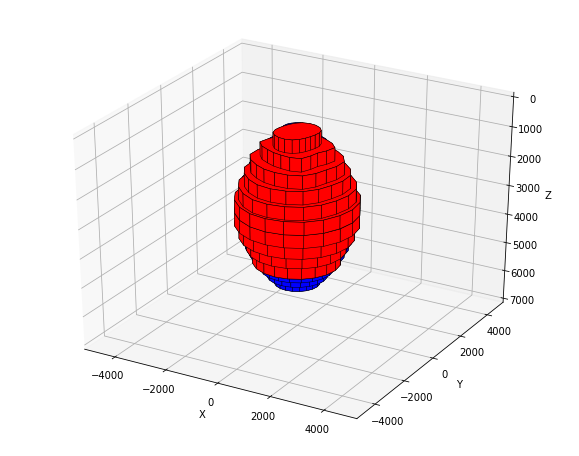

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
 facecolors='b', linewidths=0.5, edgecolors='k', alpha=0.25))
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='r', linewidths=0.5, edgecolors='k', alpha=0.25))

ax.set_xlim(-5000, 5000, 100)
ax.set_ylim(-5000, 5000, 100)
ax.set_zlim(7000,0,100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()